HOMEWORK 5 - GENDER INCOME INEQUALITY

My homework: https://github.com/lgladson/PUI2016_lag552/blob/master/HW5_lag552/HW5_Assignment%202_lag552.ipynb

Hers: https://github.com/fedhere/PUI2016_fb55/blob/master/HW5_fb55/solutions/genderIncomeBias.ipynb

In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json

from scipy import stats
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

## 1. Create 2 python dictionaries to store your data

In [4]:
#assambling file name from known and variable pieces
#storing data in 2 dictionaries
allmales={}
allfemales={}
fnamedict = {'all' : 1, 'white' : 4, 'black' : 6, 
             'asian' : 8, 'hispanic' : 9,
             'f' : (allfemales, 3), 'm' : (allmales, 2)}

for k in ['f', 'm']:
    for race in fnamedict:
        if not race == 'f' and not race == 'm':
            print (race)
            fnamedict[k][0][race] = pd.read_excel(url + 
                                        '/pinc08_%d'%fnamedict[k][1] + 
                                        '_1_%d'%fnamedict[race] + 
                                        '.xls', 
                                        header=(9))
        
allfemales.keys(), allmales.keys()
col = {'all': 'IndianRed', 'hispanic': 'SteelBlue', 'black': 'blue', 
      'white': 'DarkOrange', 'asian': 'olive'}

asian
white
black
hispanic
all
asian
white
black
hispanic
all


In [5]:
# Descriptive phase: 
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### asian
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN         

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

## 2. Exploratory Phase

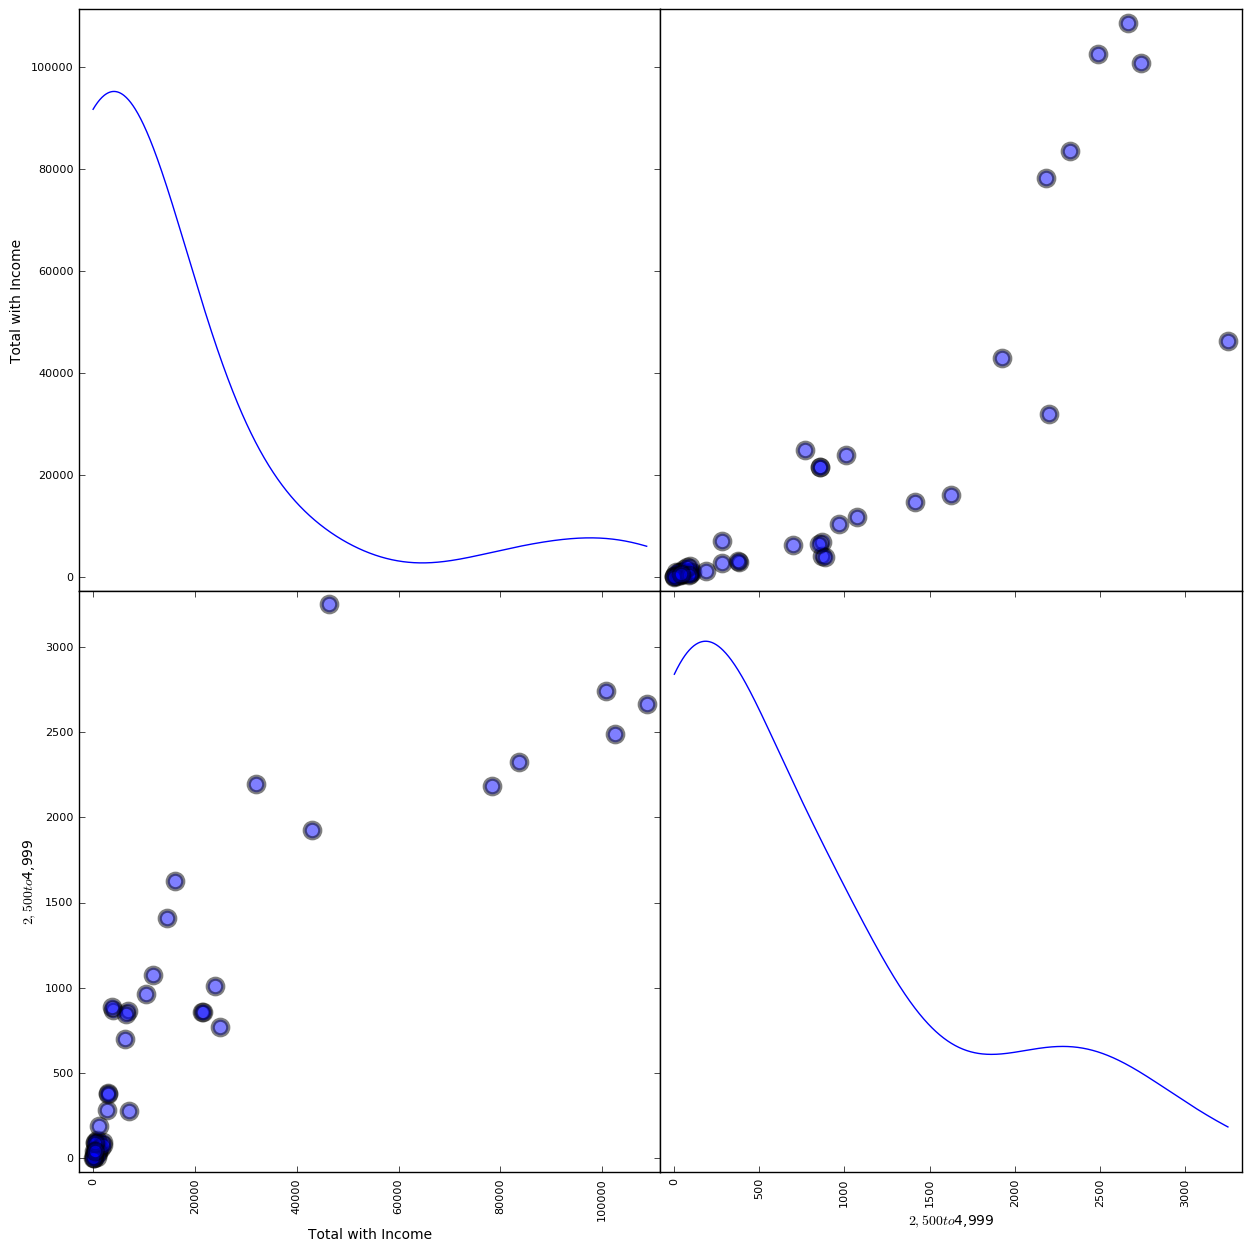

In [6]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

Figure 1: Scatter matrix. Each numerical dataframe column is plotted against each other, and the diagonal plots are the Kernel Distributions Estimates of the distribution. Columns of interest are 'Total with Income', 'Median Income', 'Gini ratio', and '$2,500 to $4,999' as a single representative income bracket

## REMOVE NONREAL VALUES - Data cleaning

In [7]:
# removing non real (i.e. non numerical) values from dataframes
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


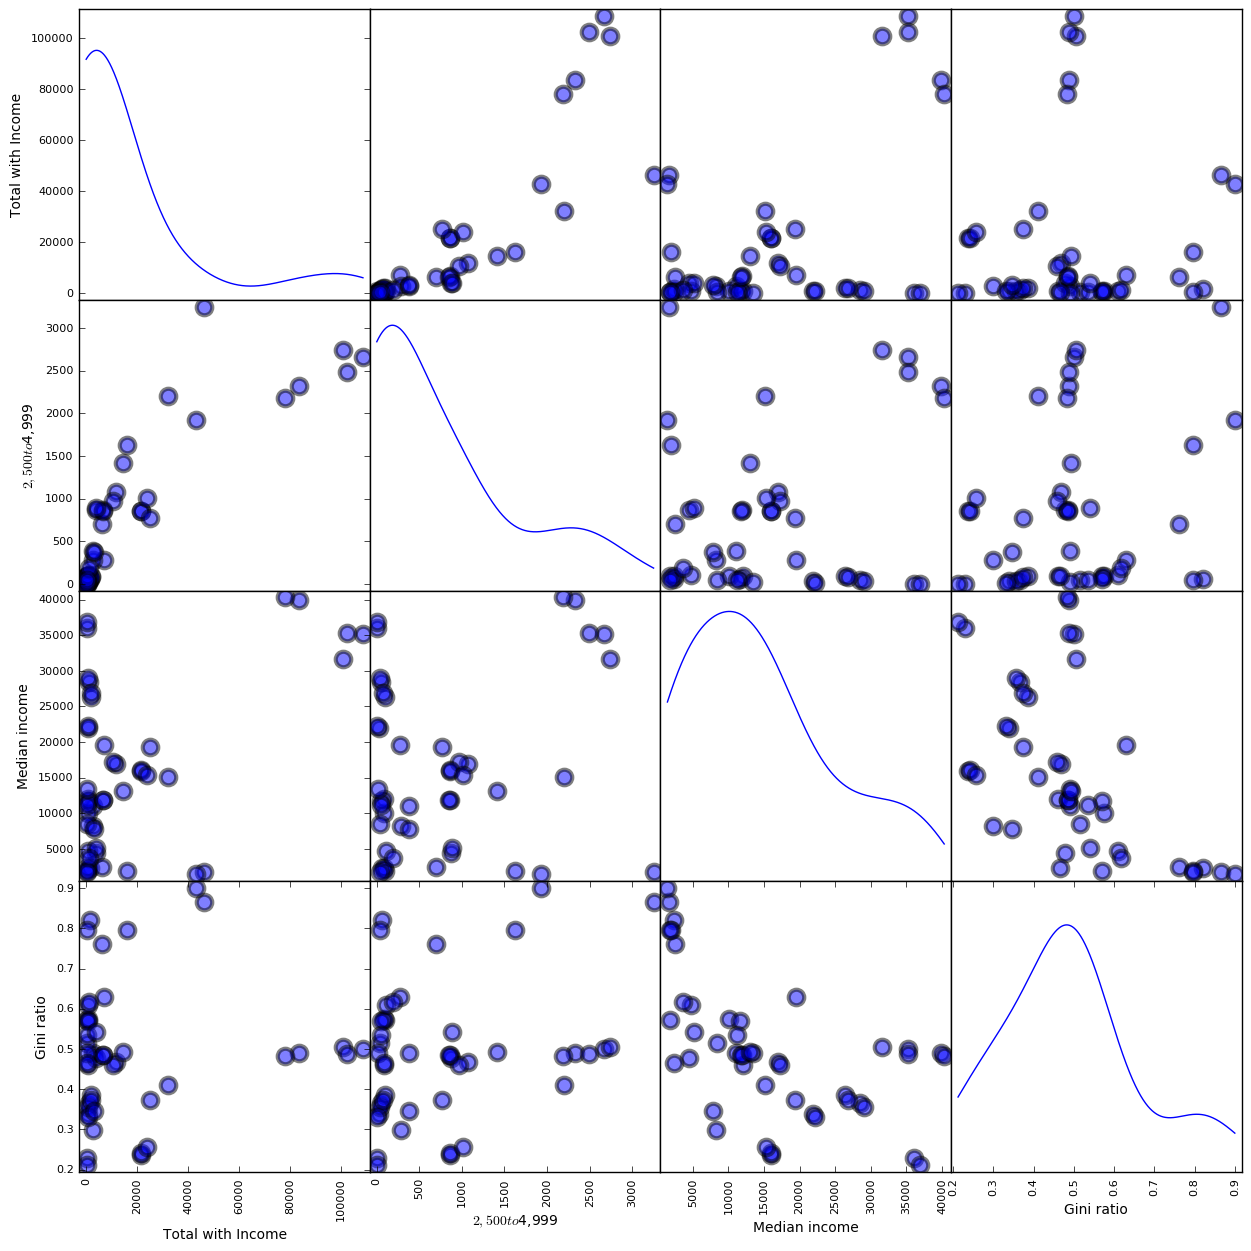

In [8]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

Figure 2: Scatter matrix. As Figure 1, but after data cleaning more columns can be plotted. All columns that are thought to be of possible interest, 'Total with Income', 'Median Income', 'Gini ratio', and '2,500to4,999' are now plotted. The most obvious pattern is the correlation of '2,500to4,999' income and 'Total with income'

## 3. PLOT against each other

### to see how the male and female income relate to each other,
### plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

### also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

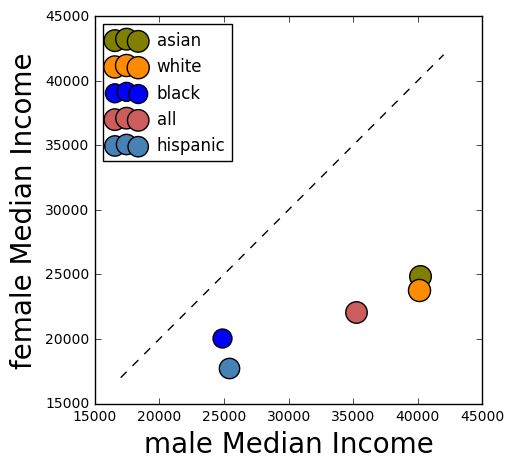

In [9]:
#plotting the Total median incame by race and
#and adding a 1-1 regression line: how things would be if the income was gender unbiased

#in the same loop: storing the values of each datapoint in 2 arrays
all_m = np.zeros(len(allmales) + 1)
all_f = np.zeros(len(allmales) + 1)
    

#make sure the figure is squares, 
#so that the income equality is in fact a diagonal 45deg line 
#and income equalities can be picked out by eye
# I think the 150 here is the sd she chose
pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
                allfemales[k]['Median income'][1],
                c=col[k], label=k)
    all_m[i] = allmales[k]['Median income'][1]
    all_f[i] = allfemales[k]['Median income'][1]
pl.plot([17000, 42000], [17000, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)
pl.legend(loc=2)

# FIT THE DATA WITH A LINE

## NUMPY POLYFIT LINE - So much easier!!

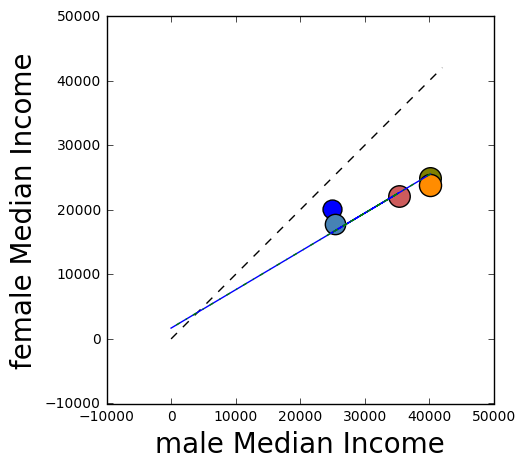

In [15]:
#also calculate the numpy polyfit line - EASIER
beta1_np, beta0_np = np.polyfit(all_m, all_f, 1) 

pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
                c=col[k], label=k)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)


pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, label="best fit line: %.1f x + %.1fe4"\
       %(result.x[0], result.x[1]))

# NUMPY POLYFIT LINE - THIS IS EASIER!!!
pl.plot(all_m, all_m * beta1_np + beta0_np, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(beta1_np, beta0_np))
#pl.legend(loc=2)

## also could use statsmodels, OTHER METHODS FOR BEST FIT - basically if needed only

HERS: https://github.com/fedhere/PUI2016_fb55/blob/master/HW5_fb55/solutions/genderIncomeBias.ipynb

## THE HARD WAY - ignore if possible

In [10]:
#pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

# CAN COPY THIS ENTIRE THING
def line (x, pars):
    '''Creates the dependent variables of a line
    Arguments:
        x: series, independent variable
        pars: series of 2 paramters, slope and intercept
    Return:
        dependent variable array
    '''
    if not isinstance(x, numpy.ndarray) and not isinstance(x, int) \
        and not isinstance(x, float):
        print ('You must pass an array or a single number for the dependent variable')
    if not pars.shape == (2,):
        print ('You must pass a 1D series of 2 parameters in pars')
    a, b = pars
    y = a * x + b
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(pars, data, model, error=None):
    '''Calculates the residuals between model and data
    Arguments:
        data: series - 1D array of datapoints
        model: series - 1D array of model predictions
        error (optional): series - 1D array of errors on data 
    Returns:
        sum of residuals square
    '''
    residuals = (line(data, pars) - model)**2
    if error:
        residuals = residuals / error**2
    
    return residuals.sum()

p0 = (0.5,1000)

#here the model is the female income given the male income: a regression line
##important!! never work with very large numbers! always try to reduce your numbers to ~unity
# NOW MUST PUT IN OWN VARIABLES:

result = minimize(residuals, p0, args=(all_m/1e4, all_f/1e4))
result

      fun: 0.205316264150829
 hess_inv: array([[ 0.04360532, -0.12047337],
       [-0.12047337,  0.41617872]])
      jac: array([ -2.77720392e-06,  -1.62050128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([ 0.59384338,  0.1674696 ])

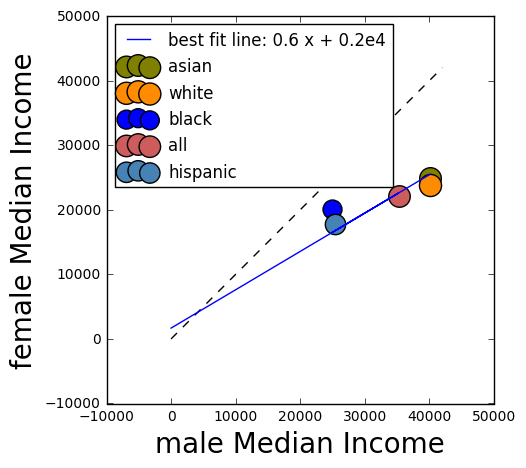

In [12]:
pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
                c=col[k], label=k)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)

# CODE FOR BEST FIT LINE: 
# all_m is x in the y=mx+b equation
# result 0 is the slope, 1 is the intercept *1e4 (to make the graph nice) 
pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, label="best fit line: %.1f x + %.1fe4"\
       %(result.x[0], result.x[1]))
pl.legend(loc=2)

# ALLRIGHT BACK TO IT


## 5. let's now see if all forms of income lead to a different fit

In [21]:
#this is the analytical best regression line, with an added datapoint at through the origin. 
# one could argue for the vailidity of forcing the line through the origin. 
#In a problem like this there is no obvious best choice.
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()

cor = stats.spearmanr(all_males[1:], all_females[1:])
beta1_non0 = cor[0] * all_females[1:].std() / all_males[1:].std()
beta0_non0 = all_females[1:].mean() - beta1_non0 * all_males[1:].mean()

In [22]:
#generating arrays of all income sources
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())

all_females_allincomes = np.array(
    np.concatenate([allfemales['all']['Median income'][:].values,
                    allfemales['white']['Median income'][:].values,
                    allfemales['black']['Median income'][:].values,
                    allfemales['hispanic']['Median income'][:].values,
                    allfemales['asian']['Median income'][:].values]).flatten())

#creating a masking to remove NaN values if needed
mask = ~np.isnan(all_males_allincomes) * ~np.isnan(all_females_allincomes)

In [23]:
#I will fit it with the function I created, but any fit would be ok 
#since we show they are all consistent solutions


#initial value set to the fit for the median income
p0 = result.x
result_all = minimize(residuals, p0, args=(all_males_allincomes[mask]/1e4, 
                                       all_females_allincomes[mask]/1e4))

#initial values set to th fit of the median income not including (0,0)
#I do this to test robustness to the initial conditions
p0 = (beta0_non0, beta1_non0)

result_all_non0 = minimize(residuals, p0, args=(all_males_allincomes[mask]/1e4, 
                                       all_females_allincomes[mask]/1e4))
print (result_all, result_all_non0)

      fun: 14.49793008607594
 hess_inv: array([[ 0.0020943 , -0.00313219],
       [-0.00313219,  0.00749342]])
      jac: array([  1.19209290e-07,   2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.60902051,  0.14930395])       fun: 14.497930086075941
 hess_inv: array([[ 0.0020943 , -0.00313219],
       [-0.00313219,  0.00749341]])
      jac: array([ -1.19209290e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 0.60902051,  0.14930395])


In [24]:
smresult_forced0 = sm.OLS(all_females_allincomes[mask], 
                          all_males_allincomes[mask],
                          hasconst=False).fit()
smforced0 = smresult_forced0.params

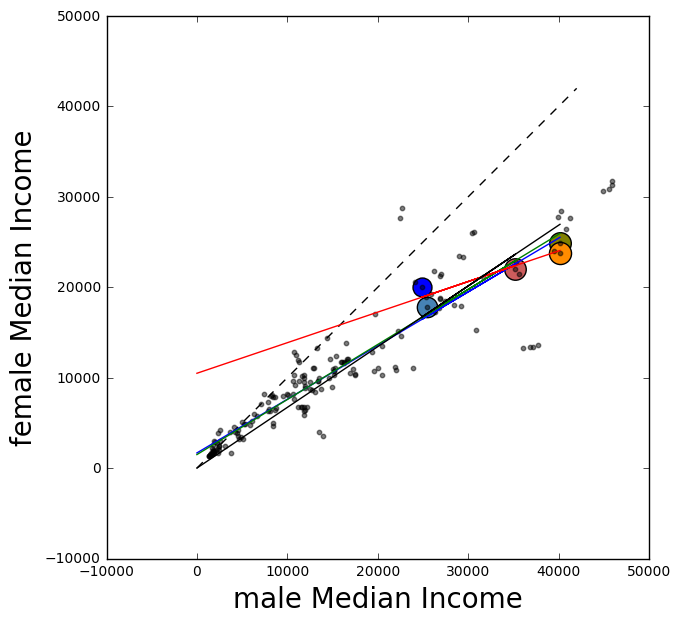

In [29]:
pl.figure(figsize = (7,7))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
                c=col[k], label=k)
    
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=10, 
           color = 'k', alpha = 0.5)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)



pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, 
        label="best fit line to all data: " + 
        "%.1f x + %.1f"\
       %(result_all.x[0], result_all.x[1]*10000))
pl.plot(all_m, all_m * result_all.x[0] + result_all.x[1] * 1e4, 
        label="analytical fit line to median income: " + 
        "%.1f x + %.1f"\
       %(beta1, beta0))
pl.plot(all_m, all_m * beta1_non0 + beta0_non0, 
        label="analytical fit line without assuming \n" + "a point at the origin: %.1f x + %.1f"\
       %(beta1_non0, beta0_non0))

pl.plot(all_m, all_m * smforced0 , 'k-',
        label="sm.OLS fit forced through (0,0): %.1f x + 0"\
       %(smforced0))

#pl.legend(loc=2)

Figure 8: as figure 4, but with the income from all sources, plotted as black dots, and the fit line to all income sources, in addition to the best line fit obtained analytically, and by forcing the line to pass through the origin (with statsmodels.api.OLS, solid black line).
The fit to all data is consistent with the fit to the median income by ethnicity, and not with the median income fit obtained without assuming the (0,0) point to the median income.
The data shows more scatter at high income, with leverage points just below 40,000. Statsmodels can produce leverage point plots

## PREDICT WHAT YOU'D MAKE

In [30]:
# my ideal stipend is $175,000
# in a job position where a man makes $175,000 I would make
ideal = 175000.
print ("In a job position where a man makes $175000 I would make $%d"%(
        result_all.x[0] * ideal +  result_all.x[1] * 10000))
print ("A man in a job position where I would make $175000 " + 
       "would make $%d"%(
        (ideal - result_all.x[1] * 10000) / result_all.x[0]))

In a job position where a man makes $175000 I would make $108071
A man in a job position where I would make $175000 would make $284895


In [35]:
# OR IF YOU'RE NOT CRAZY
female_salary = result_all.x[1]*10000 + result_all.x[0]*175000
female_salary

108071.62915029623